In [32]:
import pandas as pd
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Will we have a Table or Supplementary Table to document this? 

The table will provide very important information on the mutations. The details do not need to be spelt out in the main text unless it is striking, but if I was a reviewer, I would want to see more evidence in order to properly interpret the results.

Are there any hotspot mutations? Does any of the genes have a preponderance of loss of function (nonsense, indels, frameshift, etc) mutations which my point to a potential tumor suppressor function? Do the types of mutations support what would be expected based on the known function(s) of the genes from the literature? 
The sig_genes output from MutSig2CV has most of these information and can be modified into a Suppl. Table.

One other thing which may be helpful as a suppl figure are lolliplot figures showing where the mutations are, especially if there are striking features to present.

If we are presenting this, it may be fair game for a reviewer to ask about the frequencies of mutations in genes previously reported as SMGs in cervical cancer but not called SMGs in the discovery cohort.
A Supplementary Table should settle this.

This will take a bit of work to tease out properly. I am okay with us submitting it largely the way it is, but we should be prepared for requests for more details.

I also think this figure needs to be crosschecked. For example 11q22.1 amplifications are the #1 peaks in both HIV+ and HIV-, but the figure does not reflect this.

Plaese specify in the legend that 1b shows broad level alterations while 1c shows focal level alterations.

In [66]:
f ='/projects/trans_scratch/validations/workspace/szong/Cervical/table_with_tp_ploidy_2019SEPT20.txt'
df = pd.read_csv(f, sep='\t', usecols=['Patient', 'Tumour.content', 'tp', 'ploidy'])
df.shape
df.head(2)

(212, 4)

,Patient,Tumour.content,tp,ploidy
0,HTMCP-03-06-02001,55.0,0.897583,2.0
1,HTMCP-03-06-02002,70.0,0.688300,2.0


In [85]:
dft = df[df.ploidy<3]
dft.head(2)
(dft.tp*100 < dft['Tumour.content']).mean()

,Patient,Tumour.content,tp,ploidy
0,HTMCP-03-06-02001,55.0,0.897583,2.0
1,HTMCP-03-06-02002,70.0,0.688300,2.0


0.5972222222222222

In [82]:
dft = df[df.ploidy>2]
dft.head(2)
(dft.tp*100 < dft['Tumour.content']).mean()

,Patient,Tumour.content,tp,ploidy
2,HTMCP-03-06-02003,70.0,0.630608,4.0
10,HTMCP-03-06-02040,65.0,0.620000,3.0


0.8695652173913043

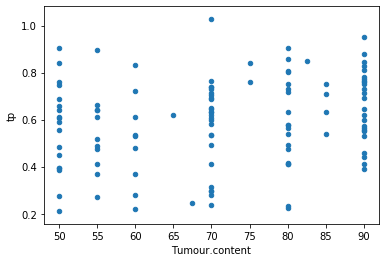

In [90]:
df[['tp', 'Tumour.content']].plot.scatter(x='Tumour.content', y='tp')


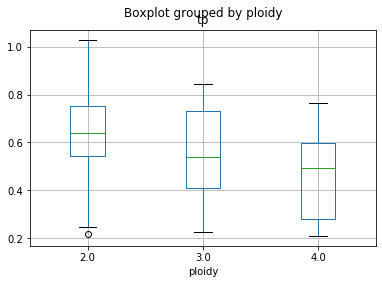

In [59]:
df[['tp', 'ploidy']].boxplot(column='tp', by='ploidy')

In [91]:
df[['tp', 'ploidy']].groupby('ploidy').mean()
df[['tp', 'ploidy']].groupby('ploidy').count()

,tp
ploidy,
2.0,0.641954
3.0,0.559218
4.0,0.459515


,tp
ploidy,
2.0,71
3.0,29
4.0,17


# look at the t/n ratio distribution between ploidy groups

In [40]:
f1 = '/home/szong/bin/GISTIC_2_0_22/gatk_118_patients/segmentationfile.txt'
df1 = pd.read_csv(f1, sep='\t')
df1.shape
df1.head(2)

(148430, 6)

,Samples,Chromosome,Start,End,Num_Probes,Segment_Mean
0,HTMCP-03-06-02256,1,10001,63000,7,-2.710885
1,HTMCP-03-06-02332,1,10001,90000,16,-0.600141


In [42]:
df2 = pd.merge(df1, df, left_on='Samples', right_on='Patient')

In [60]:
df2.head(2)

,Samples,Chromosome,Start,End,Num_Probes,Segment_Mean,Patient,tp,ploidy
0,HTMCP-03-06-02256,1,10001,63000,7,-2.710885,HTMCP-03-06-02256,0.296011,3.0
1,HTMCP-03-06-02256,1,235001,16835000,13477,0.092183,HTMCP-03-06-02256,0.296011,3.0


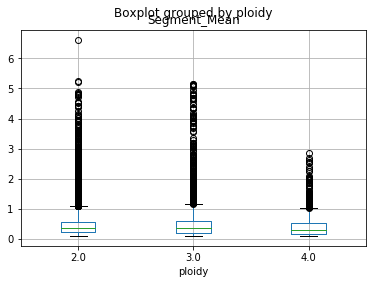

In [55]:
df2[df2.Segment_Mean>0.1][['Segment_Mean', 'ploidy']].boxplot(column='Segment_Mean',by='ploidy', )

,Segment_Mean
ploidy,
2.0,0.486430
3.0,0.471502
4.0,0.386861


In [14]:
len(ttp)

46

In [18]:
df1[df1.Samples.isin(ttp)].shape[0]/len(ttp)
df1[~df1.Samples.isin(ttp)].shape[0]/(118- len(ttp))

1232.391304347826

1274.1666666666667

In [13]:
df1[df1.Samples.isin(ttp)]['Segment_Mean'].mean()
df1[~df1.Samples.isin(ttp)]['Segment_Mean'].mean()

-0.08954333884282982

-0.09471512277087385

see if triploid and tetraploid samples (groupA) have more amplified segments than deploid samples (groupB).
groupA patients have a little less amplified segments: 369 vs 406.
groupA patients's amplification amplitude is lower: 0.44 vs 0.48, which does not make sense. 

In [65]:
df1[(df1.Samples.isin(ttp))&(df1.Segment_Mean>0.1)].shape[0]/len(ttp)
df1[(~df1.Samples.isin(ttp))&(df1.Segment_Mean>0.1)].shape[0]/(118- len(ttp))
df1[(df1.Samples.isin(ttp))&(df1.Segment_Mean<-0.1)].shape[0]/len(ttp)
df1[(~df1.Samples.isin(ttp))&(df1.Segment_Mean<-0.1)].shape[0]/(118- len(ttp))

369.0

406.2916666666667

506.6521739130435

530.5555555555555

# SMGs

In [154]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsig2cv/118_patients/smgs_15.txt'
genes = pd.read_csv(f, header=None)[0].tolist()
genes[5] = 'KMT2D'
genes

['PIK3CA',
 'RBMXL1',
 'MAPK1',
 'CASP8',
 'FBXW7',
 'KMT2D',
 'ZC3H6',
 'TAS2R43',
 'MUC17',
 'PCDHGA12',
 'FAT1',
 'ZNF750',
 'SLC35G5',
 'PCDHA9',
 'PSPC1']

# If HIV+ patients enriched in these polyploidy patients

In [124]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/HTMCP_Cervical_Master_Patient_Table_V7_20190920.xlsx'
df = pd.read_excel(f)
df.head(2)

,Patient,Cohort,HIV status,HAART therapy prior to dx,Stage,Grade,Histology from clinical data,Final histology,Pathology comment,Age,...,CD4 T-cells,T-cell content,Cibersort p-value,DNA methylation clusters,RNA-Seq clusters,Chip-Seq clusters (active),Chip-Seq clusters (all),HRD score,Tumour purity,Ploidy
0,HTMCP-03-06-02001,Discovery,Positive,YES,Stage IIB,G2,Squamous Cell Carcinoma; Non-Keratinizing,Squamous,NaN,56.0,...,0.229,0.272,0.0,one,one,two,one,6.0,0.897583,2.0
1,HTMCP-03-06-02002,Discovery,Negative,NaN,Stage IB1,G3,Squamous Cell Carcinoma; Non-Keratinizing,Squamous,NaN,62.0,...,0.322,0.648,0.2,one,one,one,one,10.0,0.688300,2.0


In [125]:
df.columns

Index(['Patient', 'Cohort', 'HIV status', 'HAART therapy prior to dx', 'Stage',
       'Grade', 'Histology from clinical data', 'Final histology',
       'Pathology comment', 'Age', 'CD4 counts at diagnosis', 'HPV type',
       'Integration', 'HPV clade', 'Coding mutation rate (Mb)',
       'Signature2_APOBEC (nnls)', 'Signature13_APOBEC (nnls)',
       'Max APOBEC score', 'CD8 T-cells', 'CD4 T-cells', 'T-cell content',
       'Cibersort p-value', 'DNA methylation clusters', 'RNA-Seq clusters',
       'Chip-Seq clusters (active)', 'Chip-Seq clusters (all)', 'HRD score',
       'Tumour purity', 'Ploidy'],
      dtype='object')

In [95]:
df = df[df.Cohort=='Discovery']
df.shape

(118, 29)

In [102]:
df.pivot_table?

In [110]:
df[['HIV status', 'Ploidy']].head(2)

,HIV status,Ploidy
0,Positive,2.0
1,Negative,2.0


In [108]:
df[['HIV status', 'Ploidy']].pivot_table(index='Ploidy', columns='HIV status', values='', aggfunc='count')

Ploidy,2.0,3.0,4.0
HIV status,72,29,17


In [111]:
df[['HIV status', 'Ploidy']].groupby('Ploidy').count()

,HIV status
Ploidy,
2.0,72
3.0,29
4.0,17


In [117]:
pd.crosstab(index=df['Ploidy'], columns=df['HIV status'])#, normalize='index')

HIV status,Negative,Positive,Unknown
Ploidy,,,
2.0,29,42,1
3.0,12,17,0
4.0,4,13,0


In [120]:
import scipy.stats as st
ddsratio, pvalue = st.fisher_exact([[0, 15], [19, 84]])
ddsratio, pvalue

(0.0, 0.1253150263559656)

In [123]:
st.fisher_exact([[4, 13], [41, 59]])
st.fisher_exact([[16, 30], [29, 42]])

(0.4427767354596623, 0.19166144556048373)

(0.7724137931034483, 0.562985895052509)

In [121]:
st.fisher_exact?

# why mutsig2cv output does not match our mutation count

In [199]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsig2cv/118_patients/mafs/118_discovery_strelka.maf'
df = pd.read_csv(f, sep='\t', low_memory=False, comment='#')
df.head(2)
df.shape

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,ExAC_AF,ExAC_AF_AFR,ExAC_AF_AMR,ExAC_AF_EAS,ExAC_AF_FIN,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO,FILTER
0,NaN,0,.,GRCh37,1,5220251,5220252,+,IGR,INS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASS
1,NaN,0,.,GRCh37,1,5220284,5220285,+,IGR,INS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASS


(2698813, 109)

In [178]:
for c in df.columns:
    print(c)

Hugo_Symbol
Entrez_Gene_Id
Center
NCBI_Build
Chromosome
Start_Position
End_Position
Strand
Variant_Classification
Variant_Type
Reference_Allele
Tumor_Seq_Allele1
Tumor_Seq_Allele2
dbSNP_RS
dbSNP_Val_Status
Tumor_Sample_Barcode
Matched_Norm_Sample_Barcode
Match_Norm_Seq_Allele1
Match_Norm_Seq_Allele2
Tumor_Validation_Allele1
Tumor_Validation_Allele2
Match_Norm_Validation_Allele1
Match_Norm_Validation_Allele2
Verification_Status
Validation_Status
Mutation_Status
Sequencing_Phase
Sequence_Source
Validation_Method
Score
BAM_File
Sequencer
Tumor_Sample_UUID
Matched_Norm_Sample_UUID
HGVSc
HGVSp
HGVSp_Short
Transcript_ID
Exon_Number
t_depth
t_ref_count
t_alt_count
n_depth
n_ref_count
n_alt_count
all_effects
Allele
Gene
Feature
Feature_type
Consequence
cDNA_position
CDS_position
Protein_position
Amino_acids
Codons
Existing_variation
ALLELE_NUM
DISTANCE
STRAND
SYMBOL
SYMBOL_SOURCE
HGNC_ID
BIOTYPE
CANONICAL
CCDS
ENSP
SWISSPROT
TREMBL
UNIPARC
RefSeq
SIFT
PolyPhen
EXON
INTRON
DOMAINS
GMAF
AFR_MAF


In [204]:
df.IMPACT.unique()

array(['MODIFIER', 'HIGH', 'MODERATE', 'LOW'], dtype=object)

In [179]:
df.Consequence.unique()

array(['intergenic_variant', 'intron_variant',
       'regulatory_region_variant', 'upstream_gene_variant',
       'downstream_gene_variant', 'non_coding_transcript_exon_variant',
       'frameshift_variant', '3_prime_UTR_variant', 'inframe_deletion',
       'missense_variant', 'synonymous_variant', '5_prime_UTR_variant',
       'splice_region_variant', 'TF_binding_site_variant', 'stop_gained',
       'splice_acceptor_variant', 'stop_retained_variant', 'stop_lost',
       'splice_donor_variant', 'mature_miRNA_variant',
       'inframe_insertion', 'start_lost',
       'incomplete_terminal_codon_variant', 'coding_sequence_variant',
       'protein_altering_variant'], dtype=object)

In [131]:
df.Variant_Classification.unique()

array(['IGR', 'Intron', "5'Flank", "3'Flank", 'RNA', 'Frame_Shift_Ins',
       'Frame_Shift_Del', "3'UTR", 'In_Frame_Del', 'Missense_Mutation',
       'Silent', "5'UTR", 'Nonsense_Mutation', 'Splice_Site',
       'Nonstop_Mutation', 'In_Frame_Ins', 'Translation_Start_Site'],
      dtype=object)

In [136]:
df.IMPACT.unique()

array(['MODIFIER', 'HIGH', 'MODERATE', 'LOW'], dtype=object)

In [201]:
for gene in genes:
    npat = df[(df.Hugo_Symbol == gene)&(df.IMPACT !='MODIFIER')&(df.IMPACT !='LOW')]['Tumor_Sample_Barcode'].nunique()
    allpat = df[(df.Hugo_Symbol == gene)&(df.IMPACT !='MODIFIER')]['Tumor_Sample_Barcode'].nunique()
    nlow = df[(df.Hugo_Symbol == gene)&(df.IMPACT =='LOW')]['Tumor_Sample_Barcode'].count()
    nsil = df[(df.Hugo_Symbol == gene)&(df.Variant_Classification =='Silent')]['Tumor_Sample_Barcode'].count()
    print(gene, npat, allpat, nlow, nsil) #allpat including silent mutations

PIK3CA 41 41 1 1
RBMXL1 5 6 2 2
MAPK1 6 6 0 0
CASP8 8 8 0 0
FBXW7 12 12 0 0
KMT2D 15 17 3 2
ZC3H6 4 4 1 1
TAS2R43 6 8 3 3
MUC17 23 26 8 8
PCDHGA12 5 7 2 2
FAT1 19 22 5 5
ZNF750 4 4 1 1
SLC35G5 8 8 1 1
PCDHA9 3 4 1 1
PSPC1 5 6 1 1


In [203]:
df[(df.Hugo_Symbol == 'PCDHA9')&(df.IMPACT =='LOW')]#[['Variant_Classification', 'IMPACT']]

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,ExAC_AF,ExAC_AF_AFR,ExAC_AF_AMR,ExAC_AF_EAS,ExAC_AF_FIN,ExAC_AF_NFE,ExAC_AF_OTH,ExAC_AF_SAS,GENE_PHENO,FILTER
2147393,PCDHA9,0,.,GRCh37,5,140389282,140389282,+,Silent,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASS


In [177]:
for i in df[(df.Hugo_Symbol == 'KMT2D')&(df.IMPACT =='MODERATE')].iloc[2]:
    print(i)

KMT2D
0
.
GRCh37
12
49441825
49441825
+
Missense_Mutation
SNP
C
C
T
novel
nan
HTMCP-03-06-02209_T
HTMCP-03-06-02209_N
C
C
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
c.4159G>A
p.Gly1387Ser
p.G1387S
ENST00000301067
14/54
79
57
21
43
42
0
KMT2D,missense_variant,p.Gly1387Ser,ENST00000301067,NM_003482.3;KMT2D,upstream_gene_variant,,ENST00000550356,;
T
ENSG00000167548
ENST00000301067
Transcript
missense_variant
4159/19419
4159/16614
1387/5537
G/S
Ggc/Agc
nan
1
nan
-1.0
KMT2D
HGNC
7133.0
protein_coding
YES
CCDS44873.1
ENSP00000301067
KMT2D_HUMAN
Q6PIA1_HUMAN,Q59FG6_HUMAN,F8VWW4_HUMAN
UPI0000EE84D6
NM_003482.3
nan
probably_damaging(1)
14/54
nan
PROSITE_profiles:PS50016,hmmpanther:PTHR22884,hmmpanther:PTHR22884:SF324,Gene3D:3.30.40.10,Pfam_domain:PF00628,SMART_domains:SM00249,SMART_domains:SM00184,Superfamily_domains:SSF57903
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
MODERATE
1.0
SNV
nan
nan
nan
1.0
nan
nan
nan
nan
nan
nan
nan
nan
1.0
PASS


In [159]:
df[(df.Hugo_Symbol == 'ZNF750')&(df.IMPACT !='MODIFIER')]['Tumor_Sample_Barcode'].unique()

array(['HTMCP-03-06-02002_T', 'HTMCP-03-06-02063_T',
       'HTMCP-03-06-02219_T', 'HTMCP-03-06-02260_T'], dtype=object)

In [198]:
df[(df.Hugo_Symbol == 'PCDHA9')&(df.IMPACT !='MODIFIER')][['Tumor_Sample_Barcode', 'Variant_Classification', 'IMPACT']]

AttributeError: 'DataFrame' object has no attribute 'Hugo_Symbol'

in my HML summary: HTMCP-03-06-02002
HTMCP-03-06-02063
HTMCP-03-06-02214
HTMCP-03-06-02219
HTMCP-03-06-02260

# look into mutsig2cv file

In [192]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsig2cv/118_patients/per_gene.mutation_counts.txt'
df = pd.read_csv(f, sep='\t')
df = df[df.name.isin(genes)].set_index('name')
df = df[[i for i in df.columns if i.startswith('HTMCP')]]
df.head()

,HTMCP-03-06-02001_T,HTMCP-03-06-02002_T,HTMCP-03-06-02003_T,HTMCP-03-06-02006_T,HTMCP-03-06-02008_T,HTMCP-03-06-02012_T,HTMCP-03-06-02013_T,HTMCP-03-06-02020_T,HTMCP-03-06-02036_T,HTMCP-03-06-02037_T,...,HTMCP-03-06-02417_T,HTMCP-03-06-02424_T,HTMCP-03-06-02427_T,HTMCP-03-06-02428_T,HTMCP-03-06-02434_T,HTMCP-03-06-02435_T,HTMCP-03-06-02437_T,HTMCP-03-06-02441_T,HTMCP-03-06-02442_T,HTMCP-03-06-02447_T
name,,,,,,,,,,,,,,,,,,,,,
CASP8,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
FAT1,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
FBXW7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,6,0,0,0,0
MAPK1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
MUC17,0,0,0,0,0,1,0,2,0,0,...,1,0,0,0,0,2,0,0,1,0


In [197]:
(df != 0).sum(axis=1)

name
CASP8       10
FAT1        23
FBXW7       12
MAPK1        8
MUC17       24
PCDHA9       3
PCDHGA12     5
PIK3CA      42
PSPC1        7
RBMXL1       5
TAS2R43      6
ZC3H6        4
ZNF750       4
dtype: int64

# was pik3ca mutation more common in older people?

In [222]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsig2cv/118_patients/smgs_reviewed_details_with_frequency_20190326.txt'
df = pd.read_csv(f)#, usecols=['hiv_status', 'final_from_Jay_Reanne'])
patients = [i for i in df.columns if i.startswith('HTMCP')] + ['percentage']
df = df[patients]
df['gene'] = df['percentage'].apply(lambda x: x.split('(')[0])
df = df.drop('percentage', axis=1).set_index('gene')
df.head(3)

,HTMCP-03-06-02075,HTMCP-03-06-02150,HTMCP-03-06-02182,HTMCP-03-06-02326,HTMCP-03-06-02203,HTMCP-03-06-02176,HTMCP-03-06-02047,HTMCP-03-06-02214,HTMCP-03-06-02063,HTMCP-03-06-02042,...,HTMCP-03-06-02225,HTMCP-03-06-02259,HTMCP-03-06-02330,HTMCP-03-06-02377,HTMCP-03-06-02393,HTMCP-03-06-02417,HTMCP-03-06-02424,HTMCP-03-06-02434,HTMCP-03-06-02437,HTMCP-03-06-02442
gene,,,,,,,,,,,,,,,,,,,,,
HIV_status,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,...,Positive,Positive,Positive,Unknown,Positive,Positive,Positive,Positive,Positive,Positive
Putative_histology,Adenocarcinoma,Adenocarcinoma,Adenosquamous,Adenosquamous,Adenosquamous,Adenosquamous,Neuroendocrine,Squamous,Squamous,Squamous,...,Squamous,Squamous,Squamous,Adenosquamous,Squamous,Squamous,Squamous,Squamous,Squamous,Adenosquamous
PIK3CA,Non-synonymous,NaN,NaN,NaN,Non-synonymous,NaN,Non-synonymous,Multi_hit,Multi_hit,Multi_hit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/HTMCP_Cervical_Master_Patient_Table_V7_20190920.xlsx'
df1 = pd.read_excel(f, usecols=['Age', 'Patient', 'Cohort']).set_index('Patient')
df1 = df1[df1.Cohort=='Discovery'].T
df1.head(2)
df1.shape

Patient,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02036,HTMCP-03-06-02037,...,HTMCP-03-06-02417,HTMCP-03-06-02424,HTMCP-03-06-02427,HTMCP-03-06-02428,HTMCP-03-06-02434,HTMCP-03-06-02435,HTMCP-03-06-02437,HTMCP-03-06-02441,HTMCP-03-06-02442,HTMCP-03-06-02447
Cohort,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,...,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery
Age,56,62,39,34,61,54,50,39,54,78,...,60,35,43,57,31,38,36,48,45,59


(2, 118)

In [232]:
df2 = pd.concat([df.head(3), df1], sort=False)
df2.head()

,HTMCP-03-06-02075,HTMCP-03-06-02150,HTMCP-03-06-02182,HTMCP-03-06-02326,HTMCP-03-06-02203,HTMCP-03-06-02176,HTMCP-03-06-02047,HTMCP-03-06-02214,HTMCP-03-06-02063,HTMCP-03-06-02042,...,HTMCP-03-06-02225,HTMCP-03-06-02259,HTMCP-03-06-02330,HTMCP-03-06-02377,HTMCP-03-06-02393,HTMCP-03-06-02417,HTMCP-03-06-02424,HTMCP-03-06-02434,HTMCP-03-06-02437,HTMCP-03-06-02442
HIV_status,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,...,Positive,Positive,Positive,Unknown,Positive,Positive,Positive,Positive,Positive,Positive
Putative_histology,Adenocarcinoma,Adenocarcinoma,Adenosquamous,Adenosquamous,Adenosquamous,Adenosquamous,Neuroendocrine,Squamous,Squamous,Squamous,...,Squamous,Squamous,Squamous,Adenosquamous,Squamous,Squamous,Squamous,Squamous,Squamous,Adenosquamous
PIK3CA,Non-synonymous,NaN,NaN,NaN,Non-synonymous,NaN,Non-synonymous,Multi_hit,Multi_hit,Multi_hit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cohort,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,...,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery,Discovery
Age,54,28,57,39,65,54,47,57,62,82,...,47,32,42,48,33,60,35,31,36,45


In [234]:
df3 = df2.T
df3.head(2)

,HIV_status,Putative_histology,PIK3CA,Cohort,Age
HTMCP-03-06-02075,Negative,Adenocarcinoma,Non-synonymous,Discovery,54
HTMCP-03-06-02150,Negative,Adenocarcinoma,NaN,Discovery,28


In [248]:
wt = df3[df3.PIK3CA.isna()]['Age'].dropna()#.median()
mut = df3[~df3.PIK3CA.isna()]['Age'].dropna()#.median()
len(wt), len(mut), wt.median(), mut.median()

(76, 41, 43.0, 52.0)

In [247]:
from scipy.stats import ttest_ind
ttest_ind(wt, mut)

Ttest_indResult(statistic=-3.8058618801807538, pvalue=0.00022814380875376208)

# copy number

we binned the genome into 1kb segments and calculated the fraction of patients having copy number gain (>0.1) or loss (<-0.1) based on the mean segment values in the segmentation file for each cohort.

 How do the results compare with the GISTIC outputs “broad_significance_results” and “broad_values_by arm”?